In [70]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [71]:
def negative_transformation(img):
  height = img.shape[0]
  width = img.shape[1]
  
  newImg = np.zeros((height, width, 1), dtype=np.uint8)
  
  for i in range(height):
    for j in range(width):
      # alternativamente a newImg[i,j] = max(0, min(255, 255 - img[i,j]))
      # puedo usar np.clip, debido a que es una operación mas sencilla
      newImg[i,j] = np.clip(255 - img[i,j], 0, 255)

  return newImg

In [72]:
def linear_transformation(img, alpha, beta):
  height = img.shape[0]
  width = img.shape[1]
  
  newImg = np.zeros((height, width, 1), dtype=np.uint8)
  
  for i in range(height):
    for j in range(width):
      # newImg[i,j] = (alpha * img[i,j]) + beta
      newImg[i,j] = np.clip((alpha * img[i,j]) + beta, 0, 255)      
    
  return newImg

In [73]:
def logarithmic_transformation(img, alpha):
  height = img.shape[0]
  width = img.shape[1]
  
  newImg = np.zeros((height, width, 1), dtype=np.uint8)
  
  for i in range(height):
    for j in range(width):
      newImg[i,j] = np.clip((alpha * np.log(img[i,j])), 0, 255)      
    
  return newImg

In [74]:
def exponential_transformation(img, alpha, ipsilon):
  height = img.shape[0]
  width = img.shape[1]
  
  newImg = np.zeros((height, width, 1), dtype=np.uint8)
  
  for i in range(height):
    for j in range(width):
      newImg[i,j] = np.clip((alpha * (img[i,j] ** ipsilon)), 0, 255)
    
  return newImg

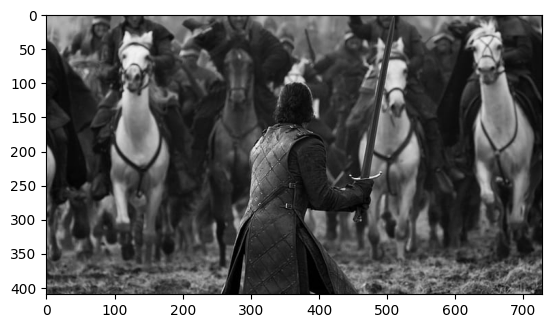

In [75]:
# Uso opencv para cargar la imagen y pasarla a escala de grises
path = './GOT.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

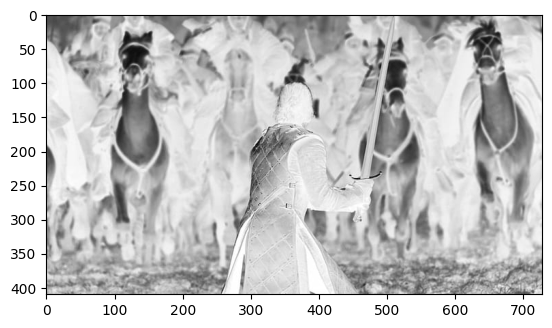

In [76]:
negative = negative_transformation(img)
plt.imshow(negative, cmap="gray")

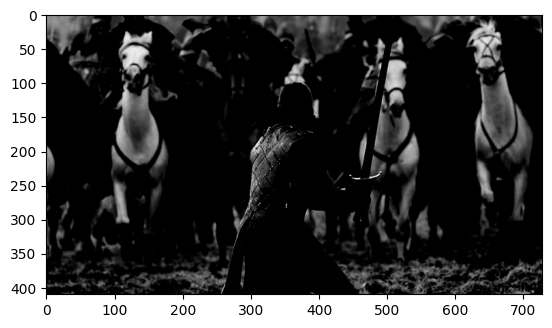

In [77]:
alpha = 0.9
beta = -70

linear = linear_transformation(img, alpha, beta)
plt.imshow(linear, cmap="gray")

/tmp/ipykernel_32200/562099217.py:9: RuntimeWarning: divide by zero encountered in log
  newImg[i,j] = np.clip((alpha * np.log(img[i,j])), 0, 255)


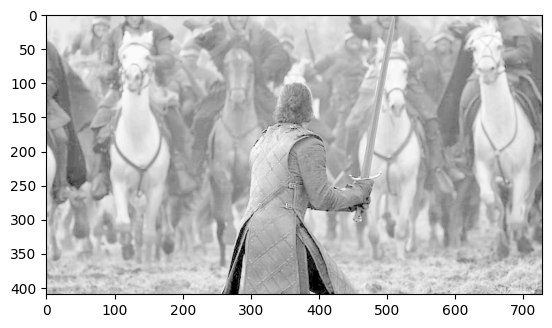

In [78]:
alpha = 10

logarithmic = logarithmic_transformation(img, alpha)
plt.imshow(logarithmic, cmap="gray")

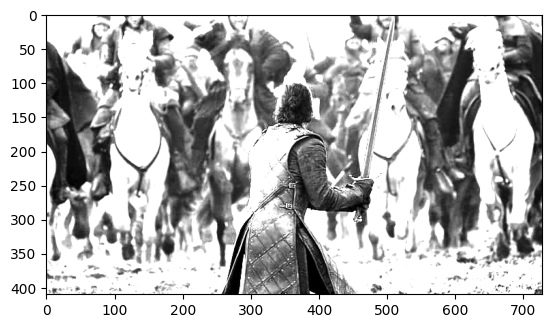

In [81]:
alpha = 0.5
ipsilon = 1.5

exponential = exponential_transformation(img, alpha, ipsilon)
plt.imshow(exponential, cmap="gray")